In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
import tensorflow as tf
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import time
from tensorflow.estimator import DNNRegressor, LinearRegressor 
from keras.layers import Dense, add, Input
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping 
from sklearn.preprocessing import MinMaxScaler
from keras import metrics
from torch.utils.data import TensorDataset, DataLoader
from numpy import loadtxt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from keras.datasets import mnist
from keras.layers import *
from keras.models import *
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential


In [ ]:
plane_data =  pd.read_csv('Airlines.csv')
plane_data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [ ]:
plane_data['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

<Axes: xlabel='Delay', ylabel='count'>

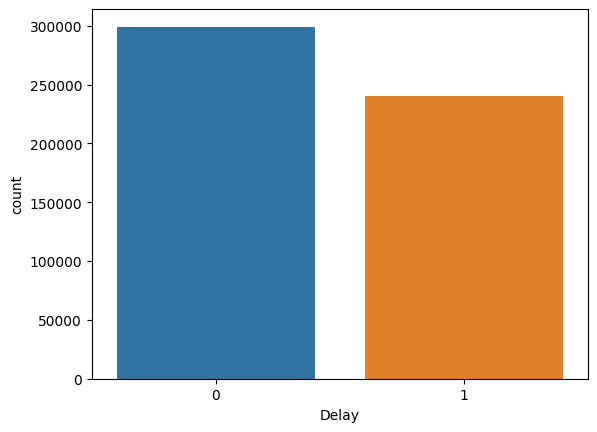

In [ ]:
sns.countplot(data=plane_data, x="Delay")

In [ ]:

# Using + operator to combine two columns
plane_data["Flight_number"] = plane_data['Airline'].astype(str) + plane_data["Flight"].astype(str)
#plane_data.drop(['Flight'])
plane_data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Flight_number
0,1,CO,269,SFO,IAH,3,15,205,1,CO269
1,2,US,1558,PHX,CLT,3,15,222,1,US1558
2,3,AA,2400,LAX,DFW,3,20,165,1,AA2400
3,4,AA,2466,SFO,DFW,3,20,195,1,AA2466
4,5,AS,108,ANC,SEA,3,30,202,0,AS108
...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,CO178
539379,539380,FL,398,SEA,ATL,5,1439,305,0,FL398
539380,539381,FL,609,SFO,MKE,5,1439,255,0,FL609
539381,539382,UA,78,HNL,SFO,5,1439,313,1,UA78


In [ ]:
plane_data = plane_data[['Airline', 'Flight_number', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']]
plane_data

,Airline,Flight_number,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,CO269,SFO,IAH,3,15,205,1
1,US,US1558,PHX,CLT,3,15,222,1
2,AA,AA2400,LAX,DFW,3,20,165,1
3,AA,AA2466,SFO,DFW,3,20,195,1
4,AS,AS108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,CO178,OGG,SNA,5,1439,326,0
539379,FL,FL398,SEA,ATL,5,1439,305,0
539380,FL,FL609,SFO,MKE,5,1439,255,0
539381,UA,UA78,HNL,SFO,5,1439,313,1


**Preprocessing**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
plane_data['Airline']

0         CO
1         US
2         AA
3         AA
4         AS
          ..
539378    CO
539379    FL
539380    FL
539381    UA
539382    US
Name: Airline, Length: 539383, dtype: object

In [ ]:
le.fit(plane_data['Airline'])
le.transform(plane_data['Airline'])
plane_data['Airline_index'] = le.transform(plane_data['Airline'])

le.fit(plane_data['Flight_number'])
le.transform(plane_data['Flight_number'])
plane_data['Flight_index'] = le.transform(plane_data['Flight_number'])

le.fit(plane_data['AirportFrom'])
le.transform(plane_data['AirportFrom'])
plane_data['From_index'] = le.transform(plane_data['AirportFrom'])

le.fit(plane_data['AirportTo'])
le.transform(plane_data['AirportTo'])
plane_data['To_index'] = le.transform(plane_data['AirportTo'])

In [ ]:
Y = plane_data['Delay']
X = plane_data[['Airline_index', 'Flight_index', 'From_index', 'To_index', 'DayOfWeek', 'Time', 'Length']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 271196)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # 
X_test_scaled = scaler.transform(X_test)

In [ ]:
Y.value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [ ]:
t = 299119/539383
t

0.5545577076029463

**2- RandomForestClassifier**

In [ ]:
def myRandomForest(Xtrain, ytrain, n=100):
  #write function here
  myRandomForest = RandomForestClassifier(n_estimators= n, random_state=271196)
  myRandomForest = myRandomForest.fit(X_train, ytrain)

  return myRandomForest

predict3 = myRandomForest(X_train, y_train).predict(X_test)
Score3 = myRandomForest(X_train, y_train).score(X_test, y_test)

In [ ]:
pd.DataFrame(dict(cols=X_train.columns, imp=myRandomForest(X_train, y_train).feature_importances_)).plot('cols', 'imp', 'barh');

SyntaxError: ignored

In [ ]:
Score3

0.6189413836788925

In [ ]:
z=[[0][0]]
n=20
for i in range(1, n+1):
  Score3 = myRandomForest(X_train_scaled, y_train, i**2).score(X_test, y_test)
  z.append([[i], [Score3]])
  print(i)

1
2
3
4
5
6


KeyboardInterrupt: ignored

In [ ]:
z

In [ ]:
Score=[]
I=[]
n=20
for i in range(2, n+1):
  I.append(z[i][0])
  Score.append(z[i][1])

In [ ]:
s=[]
for i in I:
  s.append(i[0]**2)
print(s)

In [ ]:
plt.plot(s, Score, color="b")

plt.xlabel("N_estimator")
plt.ylabel("RF Accuracy Scores")
plt.title("Finding best RF")
#plt.legend()

**3- LogisticRegression**

Accuracy: 0.5591447022834719
Confusion Matrix:
 [[67615 22341]
 [48996 22863]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.75      0.65     89956
           1       0.51      0.32      0.39     71859

    accuracy                           0.56    161815
   macro avg       0.54      0.53      0.52    161815
weighted avg       0.55      0.56      0.54    161815



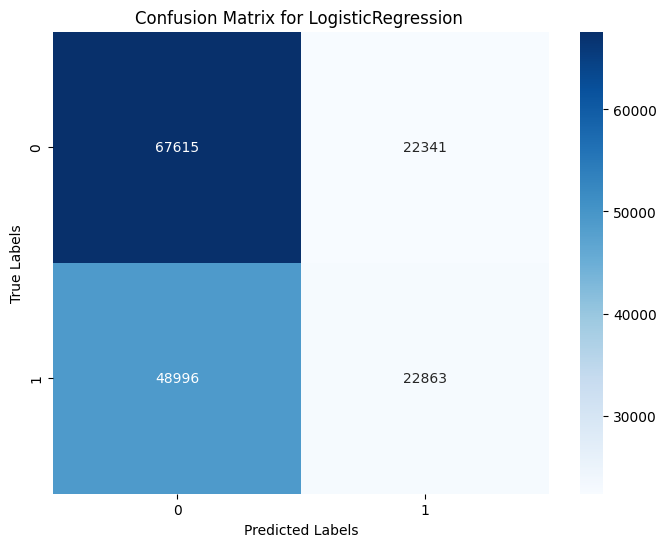

In [ ]:
lr_model = LogisticRegression()
# Train the model
lr_model.fit(X_train, y_train)

# Evaluate the model
predictions = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix for LogisticRegression ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Logistic Regression with Grid Search**

In [ ]:
# define dataset
# define models and parameters
lr_model = LogisticRegression()
solvers = ['newton-cg','liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=271196)
grid_search = GridSearchCV(estimator=lr_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

**1- DecisionTreeClassifier**

In [ ]:
# Import the required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Evaluate the model
predictions = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


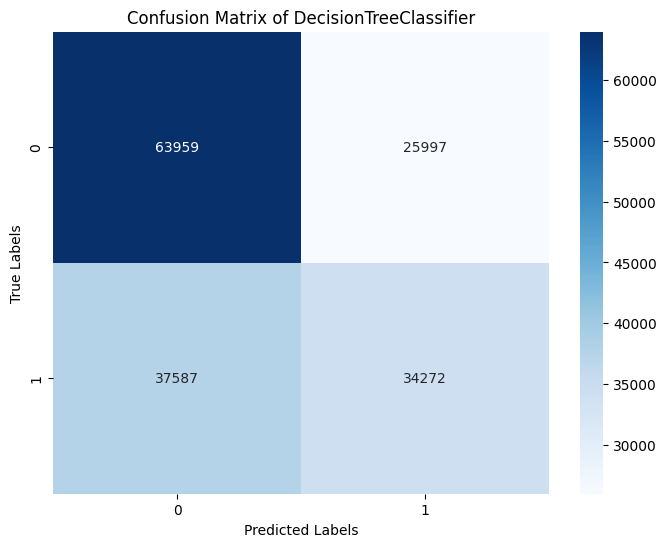

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix of DecisionTreeClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
hold=[]
top = 0
top_x=0

for i in range(1, 30):
  dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth= i, random_state=271196)
  dt_model.fit(X_train, y_train)
  predictions = dt_model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  hold.append(accuracy)
  if accuracy > top:
    top = accuracy
    top_x=i
top_x

12

In [ ]:
hold

[0.5968420727373853,
 0.6237617031795569,
 0.6237617031795569,
 0.6270988474492476,
 0.6352810308067856,
 0.636677687482619,
 0.6400024719587183,
 0.6403114667985045,
 0.6446250347619195,
 0.6465964218397553,
 0.6480363377931588,
 0.6492228779779378,
 0.648567808917591,
 0.6487964650990329,
 0.6476346445014368,
 0.6452430244414918,
 0.6435311930290765,
 0.6407193399870222,
 0.6373389364397615,
 0.6335506597039829,
 0.6298921608009146,
 0.6285016840218768,
 0.624744306770077,
 0.6210672681766215,
 0.6190464419244198,
 0.6166733615548621,
 0.6152519852918457,
 0.6139109476871736,
 0.6122856348298984]

[]

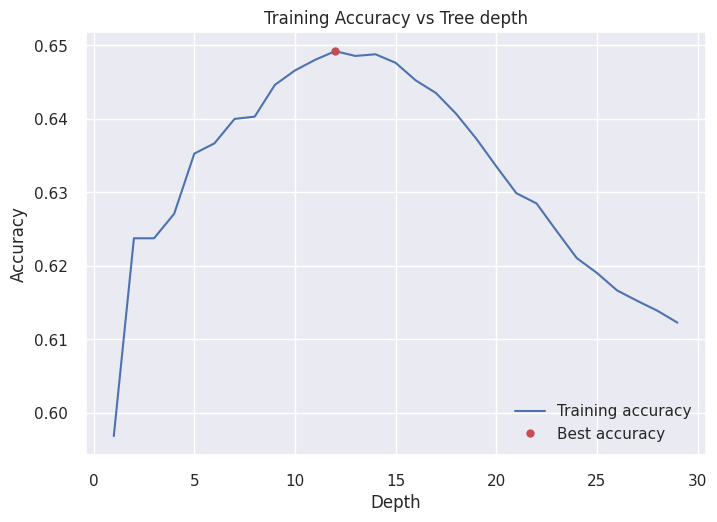

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

tree_depth = range(1, len(hold) + 1)
 
plt.plot(tree_depth, hold, '-', label='Training accuracy')
plt.plot(top_x, top, 'ro', label='Best accuracy')
plt.title('Training Accuracy vs Tree depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

0.6122856348298984

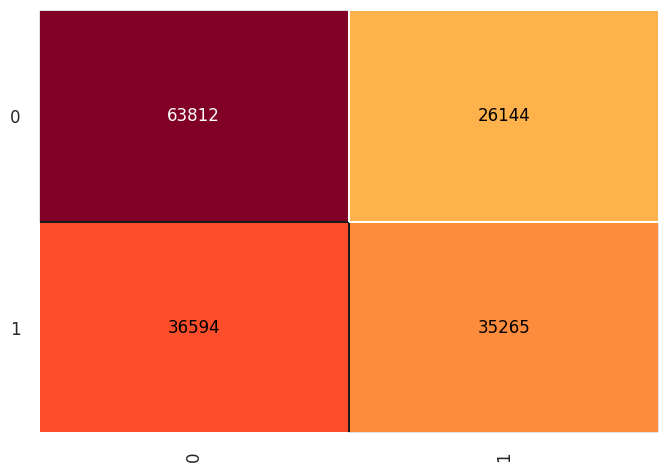

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
ConfusionMatrix(dt_model).fit(X_train, y_train)
ConfusionMatrix(dt_model).score(X_test, y_test)

**4- XGBoost Regressor**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_predicted=y_pred>0.5

# Evaluate the model
accuracy = accuracy_score(y_test, y_predicted)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 65.80%


**Random Search for XGBRegressor**

In [ ]:
model = xgb.XGBRegressor()

# Define parameter distributions
param_dist = {
    'n_estimators': [1, 5,100, 150],
    'learning_rate': [1, 0.2, 0.3],
    'max_depth': [4, 5, 11]}

# Define random search object
random_search = RandomizedSearchCV(model, 
                                   param_distributions=param_dist, 
                                   n_iter=10, scoring='accuracy', 
                                   n_jobs=-1, cv=5, random_state=271196)

# Train the random search object
random_search.fit(X_train, y_train)

# Print best parameters and accuracy score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy score: ", random_search.best_score_)

# Predict on the test set using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_predicted = y_pred > 0.5

# Evaluate the model
accuracy = accuracy_score(y_test, y_predicted)
print('Accuracy: %.2f%%' % (accuracy * 100.0))


Best parameters found:  {'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.3}
Best accuracy score:  nan
Accuracy: 66.08%


**5- XGBClassifier**

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 11,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1
}

# Train the XGBoost model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test data
y_pred = model.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy of XGBClassifier ", accuracy)


Accuracy of XGBClassifier  0.6692951827704477


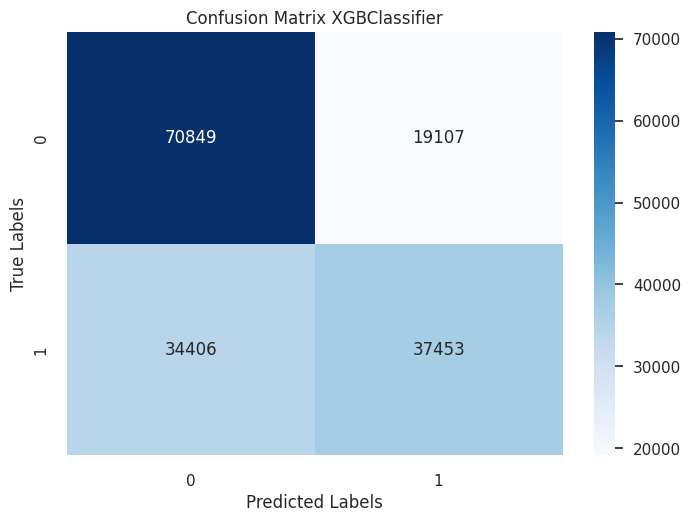

Accuracy of XGBClassifier : 0.6692951827704477


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix XGBClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print('Accuracy of XGBClassifier :', accuracy)


**Grid Search for XGBoost Classifier**

In [ ]:
param_grid = {
    'max_depth': [3, 6, 9, 11],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100]}

# Create the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic')

# Define the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of XGBClassifier: ", accuracy)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}
Best accuracy score:  0.6676678148579219
Accuracy of XGBClassifier:  0.6692951827704477


**8- KNeighborsClassifier**

In [ ]:
#KNeighborsClassifier/ Kmeans
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6452924636158576


In [ ]:
Rangee= range(1,15)
scores = {}
scores_list = []
for k in Rangee:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train, y_train)
   y_pred = knn.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[70936 19020]
 [36346 35513]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72     89956
           1       0.65      0.49      0.56     71859

    accuracy                           0.66    161815
   macro avg       0.66      0.64      0.64    161815
weighted avg       0.66      0.66      0.65    161815



**KNeighborsClassifier with Grid search !!!!**

In [ ]:
# define models and parameters #KNN advanced
leaf_size = list(range(1,5))
n_neighbors = list(range(1,3))
weights = ['uniform', 'distance']
p=[1, 2]
metric = ['euclidean', 'manhattan']
# define grid search
grid = dict(n_neighbors=n_neighbors, leaf_size=leaf_size,weights=weights,metric=metric, p=p)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=271196)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.623344 using {'leaf_size': 3, 'metric': 'euclidean', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.600356 (0.002802) with: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.600356 (0.002802) with: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.600356 (0.002802) with: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.600356 (0.002802) with: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.623169 (0.002096) with: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.612645 (0.002505) with: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.623169 (0.002096) with: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.612645 (0.002505) with: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 2, 'p': 2

**6- Binary Classifier w/ Neural Networks**

In [ ]:
modelNN = Sequential() 
modelNN.add(Dense(68, activation='relu', input_dim=7))
modelNN.add(Dense(30, activation='relu'))
modelNN.add(Dense(6, activation='relu'))
modelNN.add(Dense(1, activation='sigmoid')) 
modelNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
modelNN.summary()


In [ ]:
hist = modelNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=250)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
from sklearn.metrics import confusion_matrix
 
y_predicted = modelNN.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['On-time', 'Delayed']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Reds',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
np.unique(y_predicted, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

**1-SIGMOID _ GSD _ (0.01)**

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=X_test_scaled.shape[1] ,activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy']) 
history = model.fit(X_train_scaled, y_train, epochs=1, verbose=1) 

(loss, accuracy) = model.evaluate(X_test_scaled, y_test, verbose=1) 
y_pred = model.predict(X_test_scaled) 

y_pred= (y_pred>0.5).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model.summary()

**2-Sigmoid / GSD 0.1**

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=X_test_scaled.shape[1] ,activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy']) 
history = model.fit(X_train_scaled, y_train, epochs=1, verbose=1) 

(loss, accuracy) = model.evaluate(X_test_scaled, y_test, verbose=1) 
y_pred = model.predict(X_test_scaled) 

y_pred= (y_pred>0.5).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model.summary()

**3-Sigmoid**/**Adam**

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=X_test_scaled.shape[1] ,activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(X_train_scaled, y_train, epochs=1, verbose=1) 

(loss, accuracy) = model.evaluate(X_test_scaled, y_test, verbose=1) 
y_pred = model.predict(X_test_scaled) 

y_pred= (y_pred>0.5).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model.summary()

In [ ]:
# Print the evaluation metrics for test set
print("Test set Precision is : ", precision)
print("Test set Recall    is : ", recall)
print("Test set F1-score  is : ", f1)

**4- softmax/ gsd**

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=X_test_scaled.shape[1] ,activation='softmax')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(X_train_scaled, y_train, epochs=1, verbose=1) 

(loss, accuracy) = model.evaluate(X_test_scaled, y_test, verbose=1) 
y_pred = model.predict(X_test_scaled) 

y_pred= (y_pred>0.5).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model.summary()

**7-MLP** 







In [ ]:
model = Sequential()
model.add(Dense(8,input_dim=X_train_scaled.shape[1],activation='relu'))
model.add(Dense(8, activation='relu'))  
model.add(Dense(8, activation='relu')) 
model.add(Dense(1,activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=10, verbose=1) 
(loss, accuracy) = model.evaluate(X_test_scaled, y_test, verbose=1) 
y_pred = model.predict(X_test_scaled) 
y_pred= (y_pred>0.5).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

**MLP With the Grid search**

In [ ]:
def Grid_Search_NN_model(hidden_neurons=8, learning_rate=0.1):
    myGSModel = Sequential()
    myGSModel.add(Dense(hidden_neurons, input_dim=X_train_scaled.shape[1], activation='tanh'))
    myGSModel.add(Dense(hidden_neurons, activation='tanh'))
    myGSModel.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(learning_rate=learning_rate)
    myGSModel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy','mse'])
    return myGSModel


# Create the KerasClassifier
myGSModel = KerasClassifier(build_fn=Grid_Search_NN_model, verbose=0)

# Define the hyperparameters to tune
neurons_list = [8, 16, 32]
learning_rates_list = [0.01, 0.1]

# Create the dictionary of hyperparameters to search
param_grid = dict(hidden_neurons=neurons_list, learning_rate=learning_rates_list)

# Create the grid search object
grid = GridSearchCV(estimator=myGSModel, param_grid=param_grid, cv=3)

# Fit the grid search object to the data
grid_result = grid.fit(X_train_scaled, y_train)

# Print the results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


**Future Works**

In [ ]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=271196)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# S G B
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))